In [ ]:
# Business Problem :- 

#FIFA 20 Football is arguably the most popular sport in the world and FIFA is the most popular football (soccer) simulation game by Electronic Arts (EA Sports).
##Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Explore football skills and cluster football players based on their attributes.

Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:

 a) Prepare a rank ordered list of top 10 countries with most players. Which countries are producing the most footballers that play at this level?

   b)   Plot the distribution of overall rating vs. age of players. Interpret what is the age after which a player stops improving?

 c)     Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? 



In [1]:
# Importing Important Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading file
data = pd.read_csv('/content/players_20.csv')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
###From the above line we interpret  the data types of our features.

##data types: float64(16), int64(45), object(43)

## We must note that for training model the model we have to convert object datatype column to Numeric datatype

In [ ]:
data.shape

(18278, 104)

In [5]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

### * The Youngest Players are of age 16 years old and Oldest Players are of age 42.
### * The Potential of players lies withing the range of 49-95.

### *  Wage_eur and Value_eur columns are having minumun value as 0 which is not possible(Is it valid question) so we have to drop the rows which are having value 0 or replace 0 with some.

In [ ]:
# Some information about object dataype columns
data.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,loaned_from,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,1499,18038,1048,16990,1126,7566,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,2,83,29,316,1760,26,921,94,94,94,107,103,103,103,107,103,103,103,100,88,88,88,100,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/158023/lionel-messi/...,J. Rodríguez,Liam Kelly,1992-02-29,England,FC Barcelona,CB,Right,Medium/Medium,Normal,No,#Strength,SUB,Sassuolo,2019-07-01,SUB,Early Crosser,61+2,61+2,61+2,63+2,63+2,63+2,63+2,63+2,61+2,61+2,61+2,61+2,58+2,58+2,58+2,61+2,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,16310,514,7820,17,1465,587,501,725,725,725,736,727,727,727,736,748,748,748,809,775,775,775,809,682,636,636,636,682,667,621,621,621,667


In [ ]:
### From column player_tags to column rb missing values are present 
### we have to treat the missing value either by dropping the column or by replacing missing value with central tendency.

In [ ]:
# Check for missing value
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [ ]:
#  For full check
# a = data.isnull().sum()
# for key,value in a.iteritems():
#   print(key,"," ,value)

In [ ]:
# For full check
a= data.isnull().sum().sort_values(ascending=False)
print(a.to_string())

loaned_from                   17230
nation_position               17152
nation_jersey_number          17152
player_tags                   16779
gk_speed                      16242
gk_diving                     16242
gk_handling                   16242
gk_reflexes                   16242
gk_kicking                    16242
gk_positioning                16242
player_traits                 10712
lf                             2036
lw                             2036
rs                             2036
physic                         2036
defending                      2036
dribbling                      2036
passing                        2036
shooting                       2036
st                             2036
ls                             2036
rb                             2036
pace                           2036
rdm                            2036
rwb                            2036
ldm                            2036
lwb                            2036
rm                          

In [ ]:
# For full check
percentage_missing_value= (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
print(percentage_missing_value.to_string())

loaned_from                   94.266331
nation_position               93.839589
nation_jersey_number          93.839589
player_tags                   91.798884
gk_speed                      88.860926
gk_diving                     88.860926
gk_handling                   88.860926
gk_reflexes                   88.860926
gk_kicking                    88.860926
gk_positioning                88.860926
player_traits                 58.605974
lf                            11.139074
lw                            11.139074
rs                            11.139074
physic                        11.139074
defending                     11.139074
dribbling                     11.139074
passing                       11.139074
shooting                      11.139074
st                            11.139074
ls                            11.139074
rb                            11.139074
pace                          11.139074
rdm                           11.139074
rwb                           11.139074


In [ ]:
a.shape

(104,)

In [ ]:
data.columns.values

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

###### we have data types: float64(16), int64(45), object(43)

In [ ]:
## Data cleaning :- Removing some redundant features 
redundant_columns = ['sofifa_id','player_url','long_name','dob','nation_jersey_number','loaned_from']
data = data.drop(redundant_columns, axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 98 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   short_name                  18278 non-null  object 
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   nationality                 18278 non-null  object 
 5   club                        18278 non-null  object 
 6   overall                     18278 non-null  int64  
 7   potential                   18278 non-null  int64  
 8   value_eur                   18278 non-null  int64  
 9   wage_eur                    18278 non-null  int64  
 10  player_positions            18278 non-null  object 
 11  preferred_foot              18278 non-null  object 
 12  international_reputation    18278 non-null  int64  
 13  weak_foot                   182

In [ ]:
# To get only Numerical Column
num_col = data.select_dtypes(exclude=['object'])
num_col.head(5)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
num_col.shape

(18278, 59)

In [ ]:
num_col.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties

In [ ]:
# To get only object_datatype Column
obj_col = data.select_dtypes(include=['object'])
obj_col.head(5)

,short_name,nationality,club,player_positions,preferred_foot,work_rate,body_type,real_face,player_tags,team_position,joined,nation_position,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Argentina,FC Barcelona,"RW, CF, ST",Left,Medium/Low,Messi,Yes,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,2004-07-01,NaN,"Beat Offside Trap, Argues with Officials, Earl...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Portugal,Juventus,"ST, LW",Right,High/Low,C. Ronaldo,Yes,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,2018-07-10,LS,"Long Throw-in, Selfish, Argues with Officials,...",91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Brazil,Paris Saint-Germain,"LW, CAM",Right,High/Medium,Neymar,Yes,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,2017-08-03,LW,"Power Free-Kick, Injury Free, Selfish, Early C...",84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Slovenia,Atlético Madrid,GK,Right,Medium/Medium,Normal,Yes,NaN,GK,2014-07-16,GK,"Flair, Acrobatic Clearance",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Belgium,Real Madrid,"LW, CF",Right,High/Medium,Normal,Yes,"#Speedster, #Dribbler, #Acrobat",LW,2019-07-01,LF,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
obj_col.shape

(18278, 39)

## Univariate Analysis

In [ ]:
# 1st Approach
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 60.5 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(num_col)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


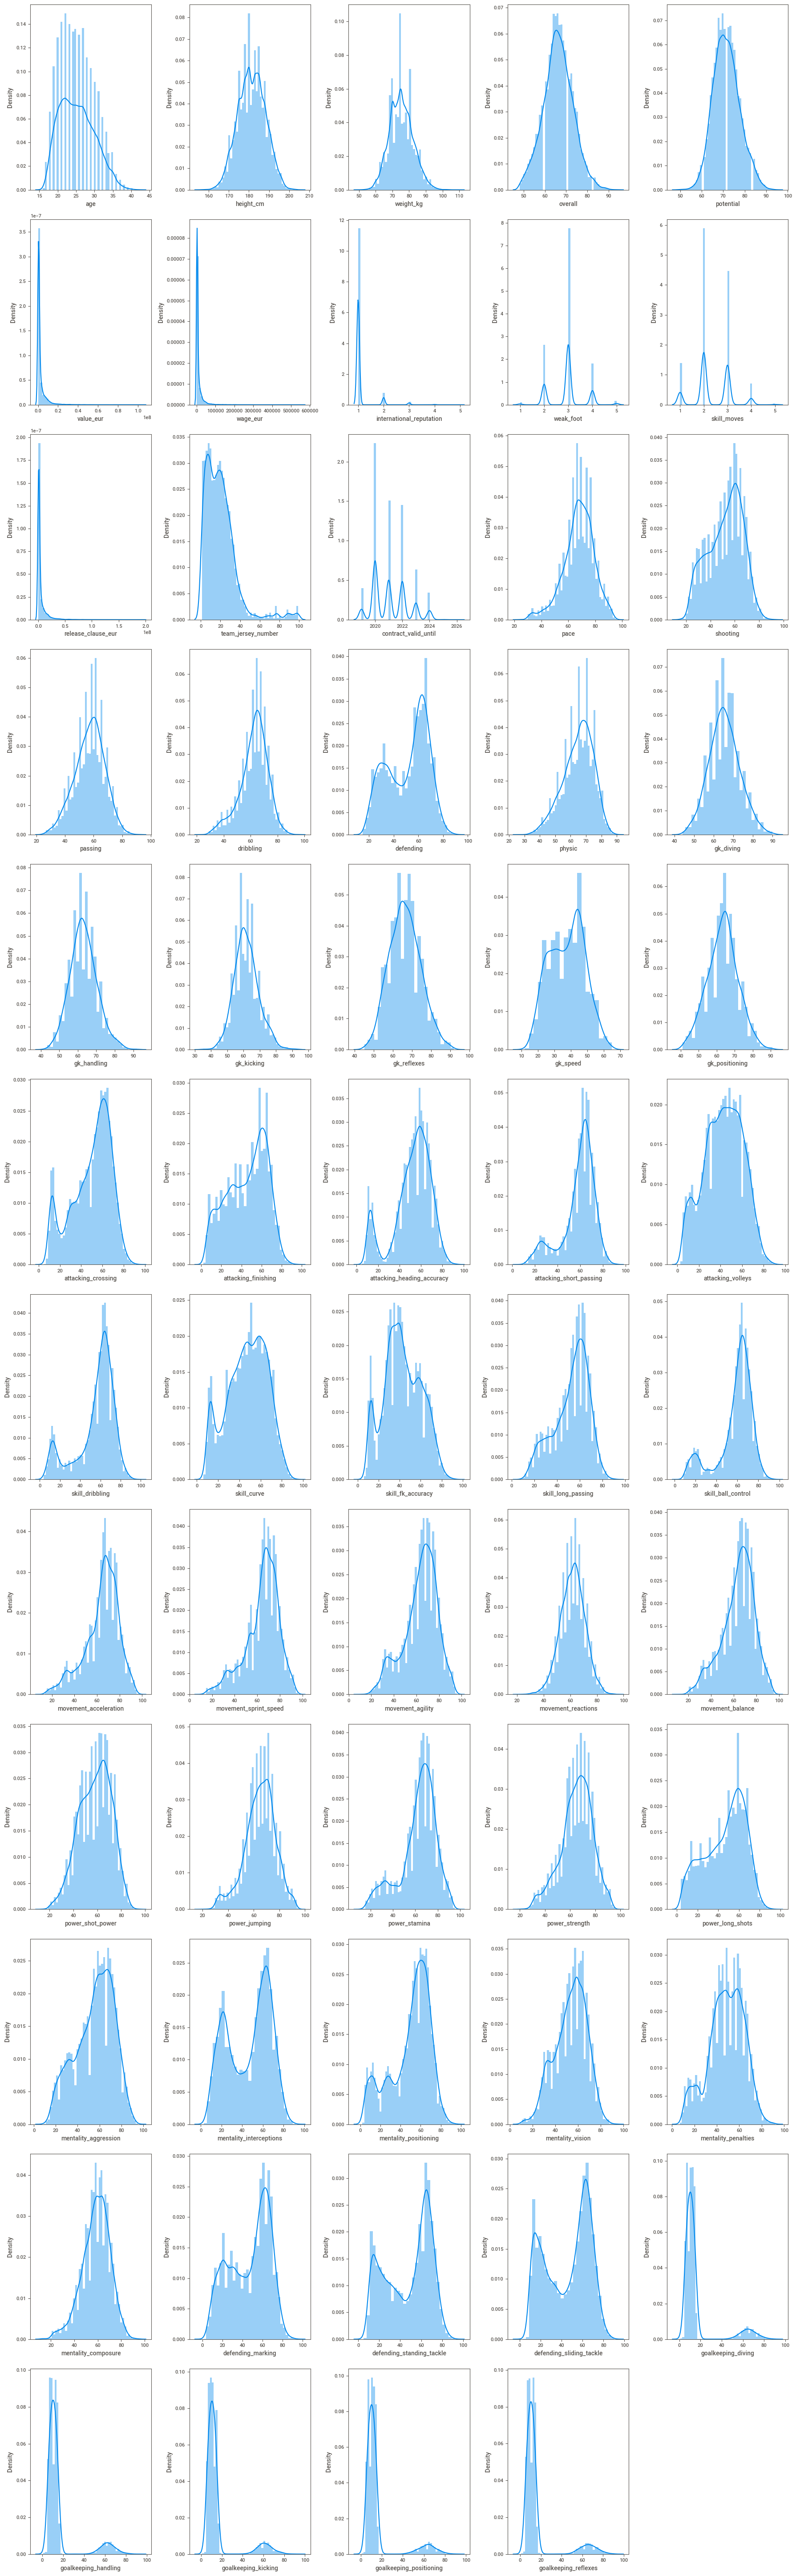

In [ ]:
# 2nd approach
plt.figure(figsize=(18,58))
plotnumber =1
for column in num_col:
  plt.subplot(12,5,plotnumber)
  sns.distplot(num_col[column])
  plotnumber += 1
plt.tight_layout()

## Insights from Univariate Analysis
1) Maximum players age lies between 20 - 30.

2) The Range for half of the player's height is 177cm - 186cm.

3) Very less % of players are having weight 50kg and 100kg.

4) Maximum players has net worth(value_eur) less than 10Milions.

6) Maximum players has wage  (0-50)Thousand euros.

7) value_eur and wage_eur are showing same type of distribution with hight positive skewness. So we have to treat these columns for before entering the training part.

8)Most of the players are having International reputaion of 1star out of 5 stars.

9)34% players are having valid contract till Year2020 and 23% palyers are having valid contract till Year2021.

10) Pace,shooting,Passing,dribbling,defending,physic columns are having 11% (2036) missing values.

11) 60% players are having passing rating from 46 to 68 out of 100.

12) gk_diving, gk_handling, gk_kicking,gk_reflexes, gk_speed, gk_positioning columns are having 89%(16,242) missing value.Either we have to drop these columns of we have to impute missing values.

13) goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning,goalkeeping_reflexes columns are having similar kind of distribution with hight positive skewness and no players are not having rating between 30-40 for these columns .


In [ ]:
obj_col.columns

Index(['short_name', 'nationality', 'club', 'player_positions',
       'preferred_foot', 'work_rate', 'body_type', 'real_face', 'player_tags',
       'team_position', 'joined', 'nation_position', 'player_traits', 'ls',
       'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [ ]:
## Create a new dataframe with categorical variables only(Check the datatype by using info function)
categorical_col1 = []#list
for column in data.columns:#for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col1.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {data[column].unique()}")#output
        print("====================================")
        
# why len(data[column].unique()) <= 50 because some times Numerical column have one flot type data so then that Numerical 
# value column treated as object type

preferred_foot : ['Left' 'Right']
work_rate : ['Medium/Low' 'High/Low' 'High/Medium' 'Medium/Medium' 'High/High'
 'Medium/High' 'Low/High' 'Low/Medium' 'Low/Low']
body_type : ['Messi' 'C. Ronaldo' 'Neymar' 'Normal' 'Lean' 'PLAYER_BODY_TYPE_25'
 'Stocky' 'Courtois' 'Shaqiri' 'Akinfenwa']
real_face : ['Yes' 'No']
team_position : ['RW' 'LW' 'CAM' 'GK' 'RCM' 'LCB' 'ST' 'CDM' 'LDM' 'RM' 'RCB' 'LCM' 'LM'
 'CF' 'SUB' 'LB' 'LS' 'RB' 'RDM' 'RES' 'RAM' 'RS' 'RF' 'CM' 'CB' 'LF'
 'LAM' nan 'RWB' 'LWB']
nation_position : [nan 'LS' 'LW' 'GK' 'LF' 'RCM' 'SUB' 'LCB' 'RW' 'RM' 'ST' 'LDM' 'RCB'
 'CDM' 'CAM' 'CF' 'RDM' 'RF' 'LB' 'LCM' 'LM' 'RB' 'CB' 'CM' 'RS' 'RWB'
 'LWB']


In [ ]:
categorical_col2 = []#list
for column in data.columns:#for loop to acess columns form dataset
    if data[column].dtype == object and len(data[column].unique()) >= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col2.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {data[column].unique()}")#output
        print("====================================")

short_name : ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'Xiao Mingjie'
 'Wang Haijian' 'Pan Ximing']
nationality : ['Argentina' 'Portugal' 'Brazil' 'Slovenia' 'Belgium' 'Germany'
 'Netherlands' 'Croatia' 'Egypt' 'France' 'Senegal' 'England' 'Spain'
 'Italy' 'Uruguay' 'Poland' 'Denmark' 'Gabon' 'Korea Republic'
 'Costa Rica' 'Slovakia' 'Bosnia Herzegovina' 'Serbia' 'Scotland'
 'Hungary' 'Switzerland' 'Greece' 'Austria' 'Morocco' 'Sweden' 'Wales'
 'Colombia' 'Czech Republic' 'Chile' 'Algeria' 'Ivory Coast' 'Togo'
 'Norway' 'Mexico' 'Iceland' 'Finland' 'Jamaica' 'Albania' 'Guinea'
 'Cameroon' 'Ghana' 'Montenegro' 'Ukraine' 'Russia' 'DR Congo'
 'Central African Rep.' 'Venezuela' 'Nigeria' 'Armenia' 'Israel' 'Ecuador'
 'Paraguay' 'Australia' 'Turkey' 'Romania' 'Japan' 'Mali' 'United States'
 'Kosovo' 'Dominican Republic' 'Tanzania' 'China PR' 'Northern Ireland'
 'Republic of Ireland' 'Tunisia' 'Cape Verde' 'FYR Macedonia'
 'Burkina Faso' 'Kenya' 'Angola' 'South Africa' 'Peru' 'Syria' '

In [ ]:
categorical_col1

['preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'team_position',
 'nation_position']

In [ ]:
# New dataset with objecttype column with less than 50 subcategory
#obj_1 = data[['preferred_foot','work_rate','body_type','real_face','team_position','nation_position']]
obj_1 = data[categorical_col1]
obj_1.head()

,preferred_foot,work_rate,body_type,real_face,team_position,nation_position
0,Left,Medium/Low,Messi,Yes,RW,NaN
1,Right,High/Low,C. Ronaldo,Yes,LW,LS
2,Right,High/Medium,Neymar,Yes,CAM,LW
3,Right,Medium/Medium,Normal,Yes,GK,GK
4,Right,High/Medium,Normal,Yes,LW,LF


In [ ]:
categorical_col2

['short_name',
 'nationality',
 'club',
 'player_positions',
 'player_tags',
 'joined',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

In [ ]:
# New dataset with objecttype column with greater than 50 subcategory
obj_2 = data[categorical_col2]
obj_2.head()

,short_name,nationality,club,player_positions,player_tags,joined,player_traits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Argentina,FC Barcelona,"RW, CF, ST","#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",2004-07-01,"Beat Offside Trap, Argues with Officials, Earl...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Portugal,Juventus,"ST, LW","#Speedster, #Dribbler, #Distance Shooter, #Acr...",2018-07-10,"Long Throw-in, Selfish, Argues with Officials,...",91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Brazil,Paris Saint-Germain,"LW, CAM","#Speedster, #Dribbler, #Playmaker , #Crosser,...",2017-08-03,"Power Free-Kick, Injury Free, Selfish, Early C...",84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Slovenia,Atlético Madrid,GK,NaN,2014-07-16,"Flair, Acrobatic Clearance",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Belgium,Real Madrid,"LW, CF","#Speedster, #Dribbler, #Acrobat",2019-07-01,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


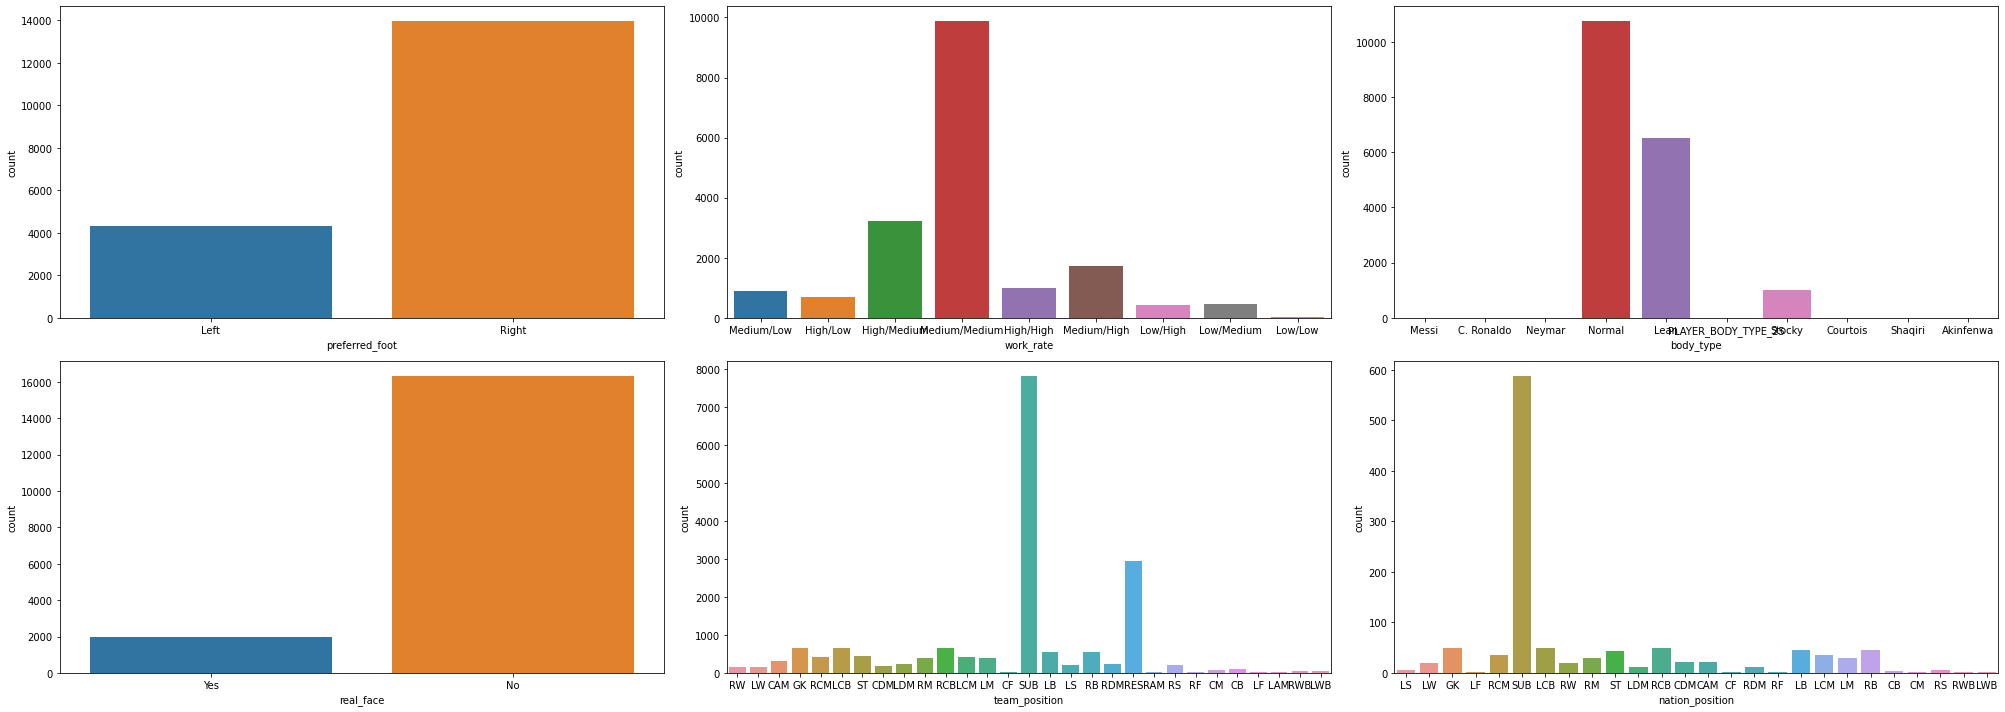

In [ ]:
# Countplot for obj_1 columns
plt.figure(figsize=(28,10))
plotnumber =1
for column in obj_1:
  plt.subplot(2,3,plotnumber)
  sns.countplot(obj_1[column])
  plotnumber += 1
plt.tight_layout()

### Observation 
1) Most of the players prefers right foot playing.

2) Maximum players are having medium type of work rate.

3) Most of the players are having Normal body type.

4) Maximum players are in category of SUB(substitution) in team_position as well as in nation_position.

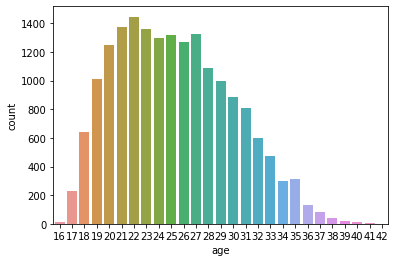

In [ ]:
# Countplot for Age
sns.countplot(x='age',data=data)

In [ ]:
# info of oldest players
data.loc[data['age'] == data['age'].max()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
11832,C. Muñoz,42,177,73,Argentina,CD Universidad de Concepción,64,64,50000,1000,GK,Right,1,3,1,Medium/Medium,Normal,No,68000.0,NaN,GK,1.0,2013-01-01,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,63.0,66.0,61.0,55.0,64.0,"Avoids Using Weaker Foot, Second Wind",25,15,13,36,12,22,19,20,34,31,53,56,33,62,58,50,73,29,65,20,35,25,16,45,24,62,18,14,19,64,63,66,64,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13003,H. Sulaimani,42,173,70,Saudi Arabia,Al Ahli,63,63,0,5000,LB,Left,1,3,3,High/Medium,Lean,No,NaN,NaN,LB,24.0,2019-01-14,2023.0,NaN,47.0,53.0,68.0,64.0,64.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,"Inflexible, Dives Into Tackles (CPU AI Only), ...",70,43,61,67,43,63,69,69,68,64,46,47,64,64,68,65,69,58,72,63,92,65,64,68,60,66,62,66,63,15,8,15,14,13,58+2,58+2,58+2,60+2,60+2,60+2,60+2,60+2,62+2,62+2,62+2,61+2,64+2,64+2,64+2,61+2,62+2,66+2,66+2,66+2,62+2,62+2,66+2,66+2,66+2,62+2


In [ ]:
# info of youngest players
data.loc[data['age'] == data['age'].min()]

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
4764,A. Hložek,16,185,80,Czech Republic,Sparta Praha,70,86,3500000,1000,"RW, ST, RM",Right,1,3,3,High/Medium,Normal,No,9900000.0,NaN,RM,20.0,2018-01-01,2022.0,NaN,74.0,68.0,66.0,74.0,30.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Crowd Favourite",68,67,73,65,66,74,64,61,62,75,73,74,70,68,72,70,70,71,75,68,69,26,68,68,61,69,25,24,23,11,10,9,11,10,70+2,70+2,70+2,70+2,70+2,70+2,70+2,70+2,69+2,69+2,69+2,69+2,63+2,63+2,63+2,69+2,52+2,50+2,50+2,50+2,52+2,49+2,46+2,46+2,46+2,49+2
6630,Fábio Silva,16,185,75,Portugal,FC Porto,68,85,1800000,1000,ST,Right,1,4,2,High/High,Normal,No,4700000.0,NaN,SUB,49.0,2019-07-01,2022.0,NaN,74.0,67.0,45.0,72.0,22.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,68,62,46,67,73,52,31,38,72,76,73,74,68,68,68,72,58,70,64,54,17,67,56,70,61,16,21,16,6,12,7,13,8,67+2,67+2,67+2,65+2,66+2,66+2,66+2,65+2,63+2,63+2,63+2,62+2,53+2,53+2,53+2,62+2,43+2,40+2,40+2,40+2,43+2,41+2,38+2,38+2,38+2,41+2
12158,E. Millot,16,175,65,France,AS Monaco,63,86,800000,1000,CM,Left,1,3,2,High/Medium,Lean,No,2300000.0,NaN,RES,49.0,2019-07-30,2022.0,NaN,73.0,55.0,63.0,70.0,50.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,55,44,65,51,69,62,59,62,69,75,72,77,61,76,55,47,53,42,52,57,53,59,62,58,65,48,52,47,13,15,12,8,8,58+2,58+2,58+2,64+2,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,61+2,61+2,61+2,64+2,58+2,56+2,56+2,56+2,58+2,56+2,51+2,51+2,51+2,56+2
12160,S. Esposito,16,186,75,Italy,Inter,63,85,825000,2000,ST,Right,1,3,2,High/Medium,Lean,No,2200000.0,NaN,SUB,70.0,2019-01-23,2022.0,NaN,52.0,63.0,50.0,66.0,26.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,67,65,54,51,67,56,39,44,68,56,49,52,59,69,58,62,53,58,62,31,20,65,56,64,45,23,21,20,15,12,12,10,10,62+2,62+2,62+2,59+2,61+2,61+2,61+2,59+2,60+2,60+2,60+2,57+2,54+2,54+2,54+2,57+2,41+2,40+2,40+2,40+2,41+2,39+2,37+2,37+2,37+2,39+2
14626,A. Velasco,16,167,63,Argentina,Independiente,60,83,450000,1000,"LM, RM, ST",Right,1,3,3,High/Medium,Lean,No,1100000.0,NaN,SUB,9.0,2018-07-01,2022.0,NaN,68.0,50.0,55.0,62.0,47.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,Crowd Favourite,44,47,54,65,43,62,48,42,62,58,72,65,58,61,88,62,56,64,37,47,64,48,58,49,47,47,43,46,57,8,7,12,10,7,56+2,56+2,56+2,57+2,58+2,58+2,58+2,57+2,58+2,58+2,58+2,58+2,57+2,57+2,57+2,58+2,55+2,54+2,54+2,54+2,55+2,55+2,50+2,50+2,50+2,55+2
17614,D. Obbekjær,16,193,86,Denmark,Odense Boldklub,53,71,110000,1000,CB,Right,1,4,2,Medium/Medium,Lean,No,206000.0,NaN,SUB,22.0,2019-04-01,2021.0,NaN,53.0,26.0,38.0,42.0,50.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,22,51,48,28,36,45,26,50,47,52,53,46,45,60,33,60,44,66,23,50,50,38,29,33,40,47,53,51,12,10,7,9,9,39+2,39+2,39+2,38+2,38+2,38+2,38+2,38+2,39+2,39+2,39+2,39+2,42+2,42+2,42+2,39+2,44+2,48+2,48+2,48+2,44+2,46+2,51+2,51+2,51+2,46+2
17782,S. Anderson,16,175,64,United States,Colorado Rapids,52,75,100000,1000,RB,Right,1,2,2,Medium/Medium,Lean,No,245000.0,NaN,SUB,22.0,2

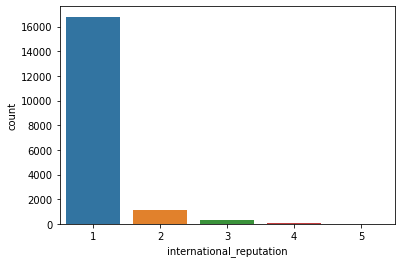

In [ ]:
# Count of International_reputation
sns.countplot(x='international_reputation',data=data)

In [ ]:
# Top 5 players having maximum rating (5)
data.loc[data['international_reputation']==data['international_reputation'].max()].head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,LS,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,LW,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,Right,5,4,3,High/Medium,Normal,Yes,108700000.0,"#Distance Shooter, #Strength, #Clinical Finish...",ST,9.0,2014-07-11,2021.0,NaN,73.0,89.0,80.0,84.0,51.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Speed Dribbler (CPU AI Only)",78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,86+5,86+5,86+5,83+5,85+5,85+5,85+5,83+5,84+5,84+5,84+5,82+5,79+5,79+5,79+5,82+5,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5
31,M. Neuer,33,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.0,NaN,GK,1.0,2011-07-01,2021.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


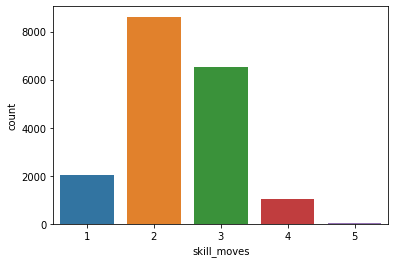

In [ ]:
sns.countplot(x='skill_moves',data=data)

 Top 10 Countries with Maximum Players

In [53]:
data['nationality'].value_counts().sort_values(ascending=False)

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
             ... 
Ethiopia        1
Barbados        1
Malawi          1
Vietnam         1
Indonesia       1
Name: nationality, Length: 162, dtype: int64

In [23]:
# top_country = data.nationality.value_counts().sort_values(ascending=False)
# print(top_country[:10])
# print(type(top_country))
data['nationality'].value_counts().sort_values(ascending=False).head(10)

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

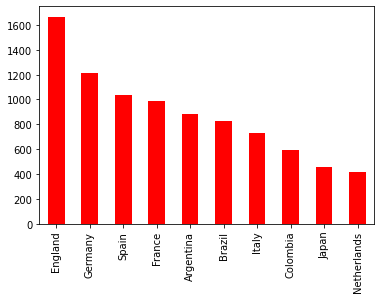

In [22]:
data['nationality'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='red')

In [55]:
data['nationality'].value_counts().sort_values(ascending=False).head(10).index

Index(['England', 'Germany', 'Spain', 'France', 'Argentina', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7f2fcf74b8e0>,
 [Text(1.1595277822091286, 0.784535099460298, 'England'),
  Text(-0.05806604265853091, 1.0984663557387535, 'Germany'),
  Text(-0.8307868428532461, 0.7209668659112817, 'Spain'),
  Text(-1.0999820715215347, -0.006280312985304899, 'France'),
  Text(-0.860154447809644, -0.6856634202823472, 'Argentina'),
  Text(-0.3120279443444562, -1.0548168381042147, 'Brazil'),
  Text(0.29088880140031975, -1.0608410367344796, 'Italy'),
  Text(0.7414916863310784, -0.8125208176421659, 'Colombia'),
  Text(0.9863718635382102, -0.4868989082141783, 'Japan'),
  Text(1.4835035695836662, -0.22184940620276616, 'Netherlands')],
 [Text(0.7454107171344397, 0.5043439925101916, '18.93%'),
  Text(-0.03167238690465322, 0.5991634667665928, '13.81%'),
  Text(-0.4531564597381342, 0.3932546541334263, '11.76%'),
  Text(-0.599990220829928, -0.0034256252647117628, '11.18%'),
  Text(-0.4691751533507148, -0.3739982292449166, '10.06%'),
  Text(-0.17019706055152153, -0.5753546389659352

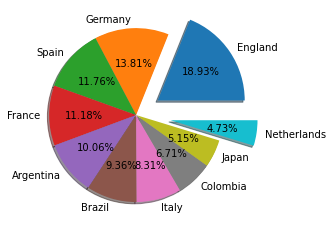

In [58]:
# % Wise Top 10 countries with Maximum Players 
myexplode = [0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0.4]
plt.pie(data['nationality'].value_counts().sort_values(ascending=False).head(10), labels=data['nationality'].value_counts().sort_values(ascending=False).head(10).index, autopct='%1.2f%%', explode=myexplode, shadow=True)

In [ ]:
# Top 5 players having maximum skill_moves rating (5)
data.loc[data['skill_moves']==data['skill_moves'].max()].head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,LS,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,LW,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,Yes,191700000.0,"#Speedster, #Dribbler, #Acrobat",RW,7.0,2018-07-01,2022.0,RM,96.0,84.0,78.0,90.0,39.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Early Crosser, Spe...",78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3
24,P. Pogba,26,191,84,France,Manchester United,88,91,72500000,250000,"CM, CDM",Right,4,4,5,High/Medium,Normal,Yes,143200000.0,"#Dribbler, #Playmaker , #Strength, #Complete ...",LDM,6.0,2016-08-09,2021.0,RDM,74.0,81.0,86.0,85.0,66.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Leadership, Argues with Officials, Fi...",80,75,75,86,84,87,85,82,90,90,67,79,75,82,66,90,82,87,89,82,78,64,83,88,83,87,63,67,65,5,6,2,4,3,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
52,Thiago,28,174,70,Spain,FC Bayern München,87,87,50000000,180000,"CM, CAM, CDM",Right,3,3,5,Medium/Medium,Normal,Yes,82500000.0,"#Dribbler, #Playmaker , #Acrobat, #Complete M...",CDM,6.0,2013-07-14,2021.0,RCM,69.0,74.0,85.0,90.0,69.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Prone, Selfish, Speed ...",78,69,54,90,86,90,85,77,87,91,76,64,91,86,88,76,76,75,59,79,56,83,79,86,75,87,67,67,71,6,11,7,9,13,75+3,75+3,75+3,82+3,81+3,81+3,81+3,82+3,84+3,84+3,84+3,82+3,84+3,84+3,84+3,82+3,78+3,78+3,78+3,78+3,78+3,75+3,69+3,69+3,69+3,75+3


In [ ]:
data['nationality'].value_counts().sort_values(ascending=False)

England      1667
Germany      1216
Spain        1035
France        984
Argentina     886
             ... 
Ethiopia        1
Barbados        1
Malawi          1
Vietnam         1
Indonesia       1
Name: nationality, Length: 162, dtype: int64

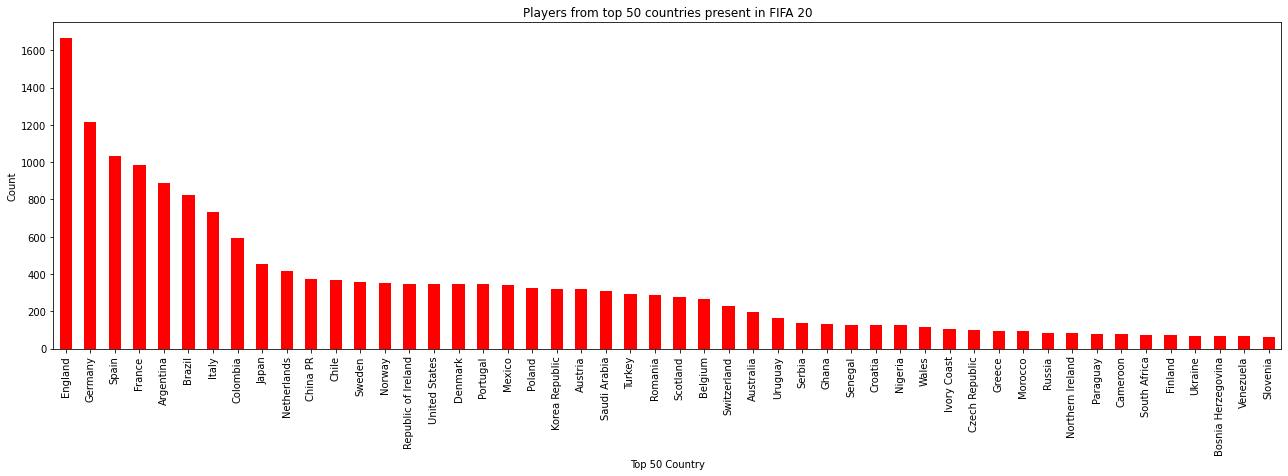

In [ ]:
# Count for different Nations
plt.figure(figsize=(22,6))
data['nationality'].value_counts().sort_values(ascending=False).head(50).plot.bar(color='red')
plt.title('Players from top 50 countries present in FIFA 20')
plt.xlabel('Top 50 Country')
plt.ylabel('Count')

plt.show()

###Check for Outliers 

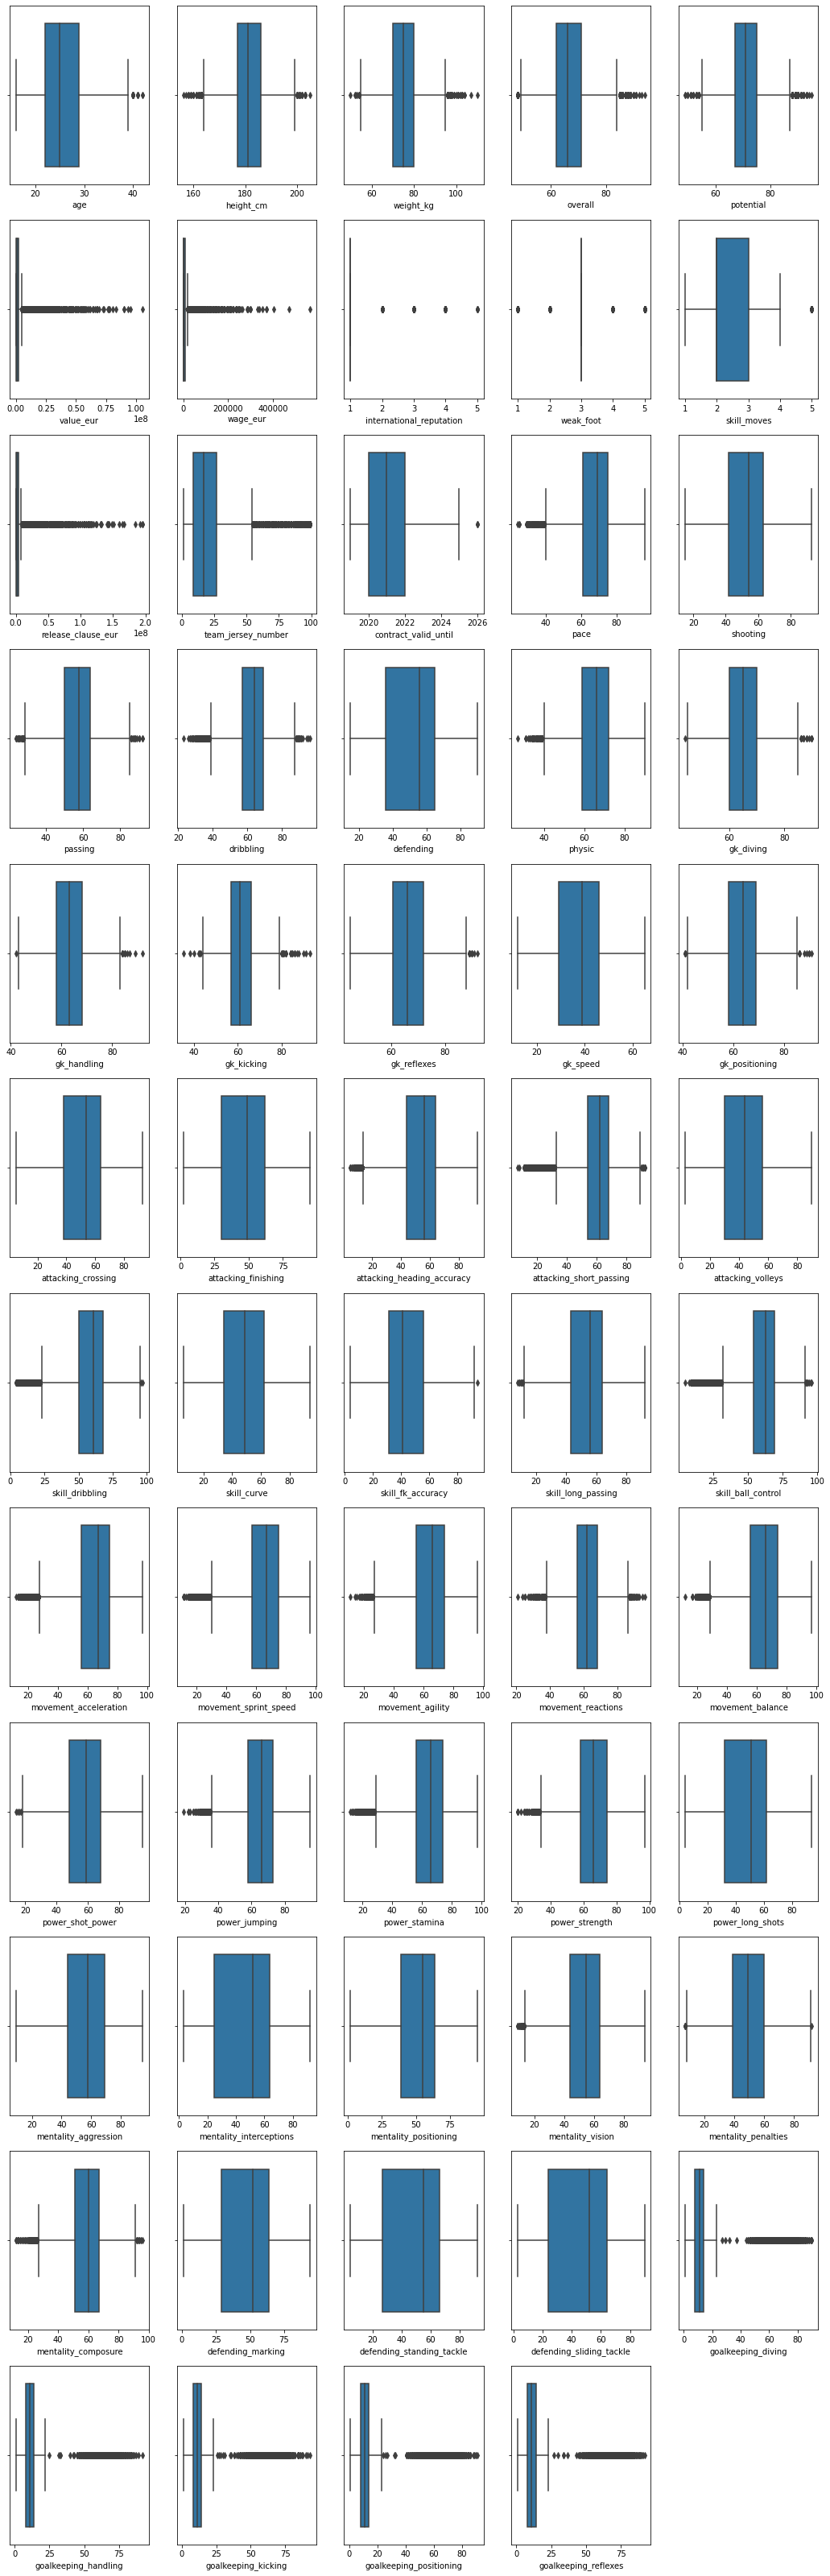

<Figure size 432x288 with 0 Axes>

In [ ]:
# Checking for Outliers
plt.figure(figsize=(18,58))
plotnumber =1
for column in num_col.columns:
  plt.subplot(12,5,plotnumber)
  sns.boxplot(x=column,data=num_col)
  plotnumber += 1
plt.show()
plt.tight_layout()

### Observation

1)age,skill_moves,contract_valid_untill,gk_speed,gk_positioning,skill_fk_accuracy,skill_long_passing,power_shot_power,mentality_vision,mentality_pentalities has few outliers.

2) goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes,goalkeepin_diving,value_eur,wage_eur,release_clause_eur,team_jersy_number are having lots of outliers.

#### Bivariate Analysis

In [32]:
#data['age'].value_counts().sort_values()

Text(0.5, 1.0, 'Age vs overall')

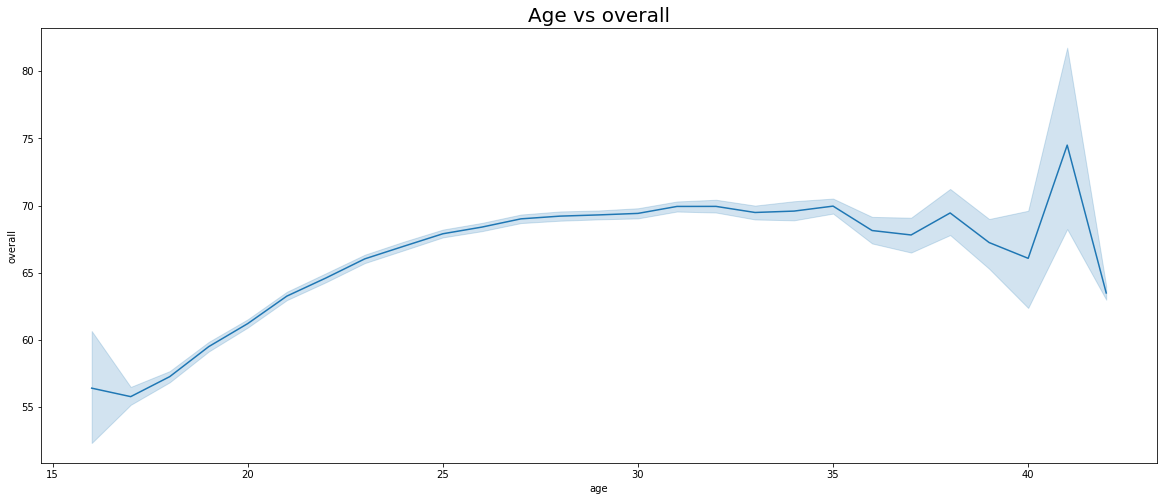

In [15]:
# Age v/s 'overall'
plt.figure(figsize=(20,8))
sns.lineplot(data['age'],data['overall'])
plt.title('Age vs overall',fontsize=20)

1. Players are improving as they gain experience.
2. Players with 30years of age performs the best and thereafter the graph decline
3. There are a few vetrans in the age group of 40 years which is seen as a peak in the graph

Text(0.5, 1.0, 'Age v/s Potential')

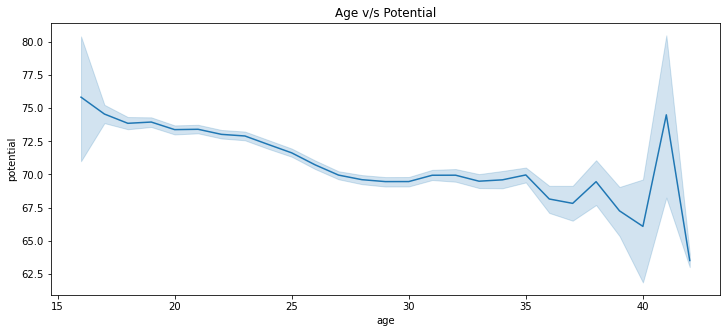

In [27]:
# Age v/s Potential 
plt.figure(figsize=(12,5))
sns.lineplot(data['age'],data['potential'])
plt.title('Age v/s Potential')

Text(0.5, 1.0, 'Height vs overall')

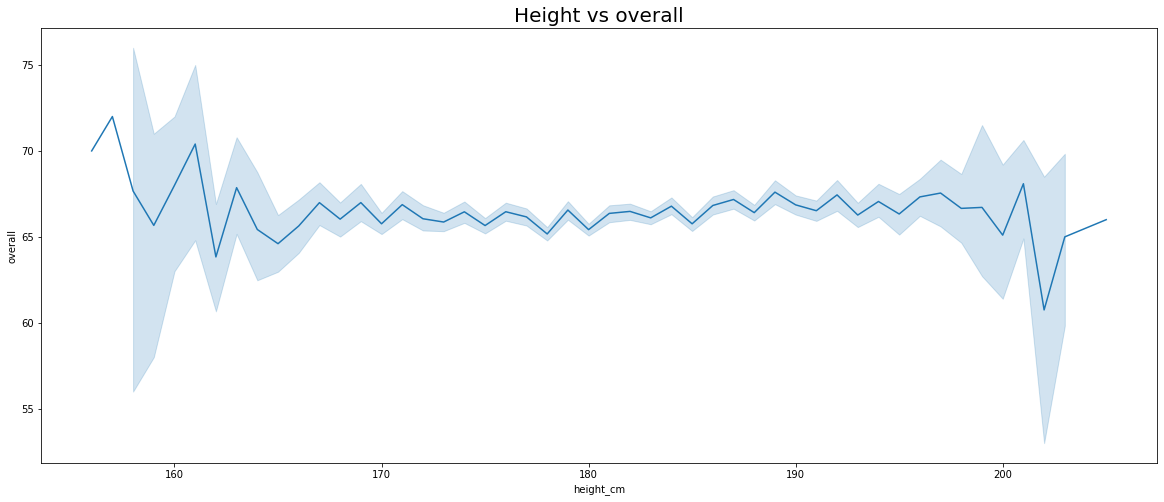

In [16]:
# Height v/s 'overall'
plt.figure(figsize=(20,8))
sns.lineplot(data['height_cm'],data['overall'])
plt.title('Height vs overall',fontsize=20)

Height of players has not strong relationship with overall rating of players.

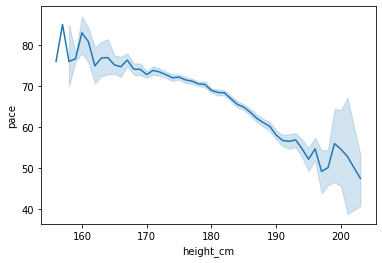

In [49]:
# Height v/s pace
sns.lineplot(data['height_cm'],data['pace'])

As height of player is decreasing pace of player is also decreasing.

In [ ]:
# Top 10 players with heighest international_reputaion 
high_international_rated = data.sort_values(by=['international_reputation'],ascending=False)
high_international_rated.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
19,L. Suárez,32,182,86,Uruguay,FC Barcelona,89,89,53000000,355000,ST,Right,5,4,3,High/Medium,Normal,Yes,108700000.0,"#Distance Shooter, #Strength, #Clinical Finish...",ST,9.0,2014-07-11,2021.0,NaN,73.0,89.0,80.0,84.0,51.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Speed Dribbler (CPU AI Only)",78,91,83,82,90,85,86,82,72,84,76,70,79,92,79,88,69,82,86,86,87,41,92,82,83,85,57,45,38,27,25,31,33,37,86+5,86+5,86+5,83+5,85+5,85+5,85+5,83+5,84+5,84+5,84+5,82+5,79+5,79+5,79+5,82+5,67+5,67+5,67+5,67+5,67+5,64+5,63+5,63+5,63+5,64+5
96,Z. Ibrahimović,37,195,95,Sweden,LA Galaxy,85,85,14000000,15000,ST,Right,5,4,5,Medium/Low,Normal,Yes,21000000.0,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,9.0,2018-03-23,2019.0,NaN,56.0,88.0,77.0,77.0,34.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Argues with Officials, Long Passer (C...",70,86,83,77,88,77,80,78,73,84,57,55,72,82,39,90,68,59,87,88,84,20,91,84,89,90,28,37,24,13,15,10,9,12,82+4,82+4,82+4,77+4,80+4,80+4,80+4,77+4,80+4,80+4,80+4,75+4,74+4,74+4,74+4,75+4,53+4,57+4,57+4,57+4,53+4,50+4,52+4,52+4,52+4,50+4
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,LS,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
31,M. Neuer,33,193,92,Germany,FC Bayern München,88,88,32000000,155000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,52800000.0,NaN,GK,1.0,2011-07-01,2021.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.

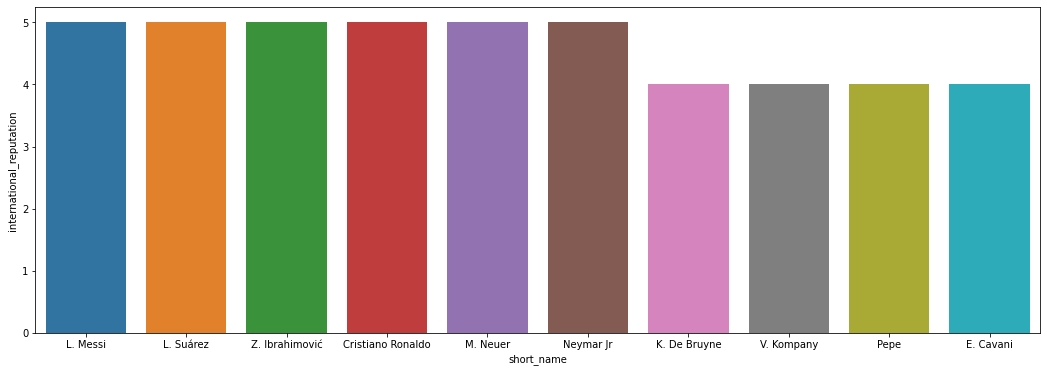

In [ ]:
# Name of top 10 players based on Heighest rating
plt.figure(figsize=(18,6))
sns.barplot(high_international_rated['short_name'].head(10),high_international_rated['international_reputation'].head(10))

In [ ]:
num_col.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties

In [ ]:
# Top  players with heighest physic_rate 
top_physic = data.sort_values(by=['physic'],ascending=False)
top_physic.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
562,M. Marega,28,186,83,Mali,FC Porto,80,80,15500000,20000,"ST, RM",Right,2,3,3,High/Medium,Stocky,No,31000000.0,#Strength,RS,11.0,2016-01-25,2021.0,NaN,88.0,79.0,63.0,65.0,41.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,Early Crosser,65,80,77,67,75,64,58,37,52,66,87,89,66,77,50,84,75,93,90,72,89,26,84,68,71,74,51,34,28,14,7,13,11,11,78+2,78+2,78+2,72+2,74+2,74+2,74+2,72+2,70+2,70+2,70+2,72+2,64+2,64+2,64+2,72+2,59+2,56+2,56+2,56+2,59+2,57+2,55+2,55+2,55+2,57+2
4026,Garrido,29,185,80,Spain,Cádiz CF,72,72,2700000,8000,"CDM, CM",Right,1,3,2,Medium/High,Stocky,No,4300000.0,#Strength,RDM,5.0,2016-07-21,2020.0,NaN,43.0,43.0,58.0,52.0,69.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,32,60,69,34,50,41,49,64,62,41,44,38,62,39,68,48,91,93,45,87,75,50,60,38,65,65,75,63,15,8,11,8,13,53+2,53+2,53+2,50+2,53+2,53+2,53+2,50+2,55+2,55+2,55+2,54+2,63+2,63+2,63+2,54+2,63+2,71+2,71+2,71+2,63+2,63+2,70+2,70+2,70+2,63+2
42,Casemiro,27,185,84,Brazil,Real Madrid,87,89,53500000,240000,CDM,Right,3,3,2,Medium/High,Normal,Yes,113700000.0,"#Tackling , #Tactician , #Strength, #Complete ...",CDM,14.0,2013-07-11,2021.0,NaN,62.0,72.0,75.0,72.0,85.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Injury Prone, Argues with Offic...",58,64,76,83,61,69,63,74,82,78,58,66,62,86,66,86,87,88,90,81,89,86,69,77,66,84,84,87,86,13,14,16,12,12,74+3,74+3,74+3,71+3,74+3,74+3,74+3,71+3,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
389,M. Sissoko,29,187,91,France,Tottenham Hotspur,81,81,17000000,105000,"CM, CDM",Right,2,3,3,High/High,Normal,Yes,31500000.0,"#Engine, #Strength",SUB,17.0,2016-08-31,2021.0,NaN,80.0,70.0,78.0,79.0,79.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Early Crosser",75,65,70,82,64,84,75,74,76,80,74,85,64,82,58,85,77,91,90,69,85,80,76,76,60,75,76,82,81,14,8,11,10,8,76+2,76+2,76+2,77+2,77+2,77+2,77+2,77+2,77+2,77+2,77+2,79+2,79+2,79+2,79+2,79+2,81+2,81+2,81+2,81+2,81+2,80+2,80+2,80+2,80+2,80+2
600,Wesley,22,191,94,Brazil,Aston Villa,79,85,17500000,61000,ST,Right,1,3,3,High/High,Stocky,No,36800000.0,#Strength,ST,9.0,2019-07-01,2024.0,NaN,77.0,76.0,68.0,73.0,38.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,74,75,76,74,75,57,49,68,80,69,83,53,74,45,84,70,81,95,73,83,37,78,71,69,78,35,37,15,12,13,14,8,6,77+2,77+2,77+2,73+2,76+2,76+2,76+2,73+2,74+2,74+2,74+2,73+2,71+2,71+2,71+2,73+2,57+2,59+2,59+2,59+2,57+2,54+2,54+2,54+2,54+2,54+2
7293,M. Bostwick,31,193,89,England,Lincoln City,68,68,675000,5000,CB,Right,1,3,2,Medium/High,Stocky,No,1200000.0,#Strength,RCB,16.0,2017-07-20,2020.0,NaN,50.0,58.0,48.0,48.0,64.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,Long Throw-in,41,49,68,53,41,46,41,63,50,50,54,47,48,63,33,74,60,87,90,68,90,65,52,42,58,61,63,64,62,15,13,6,9,9,57+2,57+2,57+2,50+2,52+2,52+2,52+2,50+2,50+2,50+2,50+2,51+2,54+2,54+2,54+2,51+2,58+2,62+2,62+2,62+2,58+2,60+2,66+2,66+2,66+2,60+2
10486,A. Co

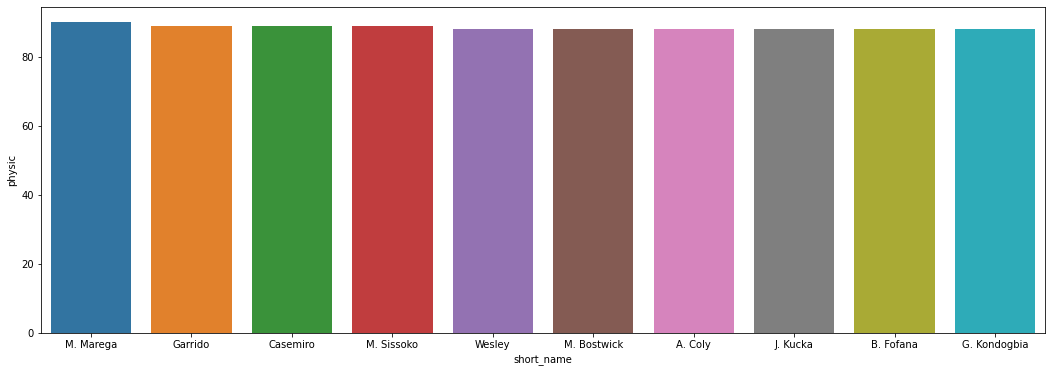

In [ ]:
# Name of top 10 players based on heighst_physic rating
plt.figure(figsize=(18,6))
sns.barplot(top_physic['short_name'].head(10),top_physic['physic'].head(10))

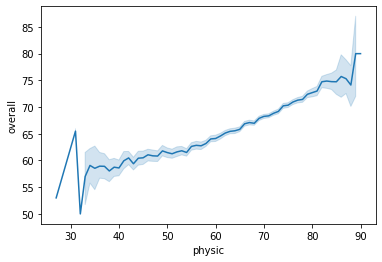

In [60]:
# Physic v/s overall
sns.lineplot(data['physic'],data['overall'])

Overall rating tends to increase with increment in physic rating of player

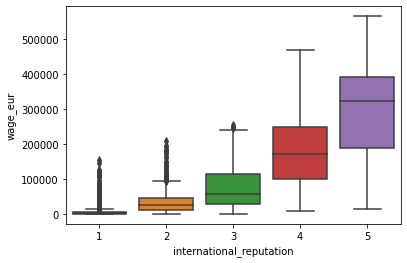

In [ ]:
# International_reputaion v/s wage_eur
sns.boxplot(y='wage_eur',x='international_reputation',data=data)

As we can see from above plot that wage of players is increasing as therir international reputaion is increasing.

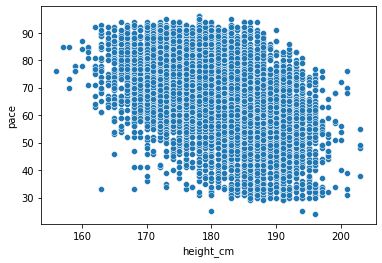

In [ ]:
# height v/s pace
sns.scatterplot(y='pace',x='height_cm',data=data)

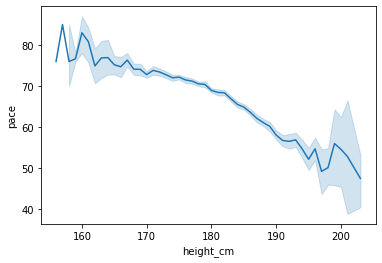

In [61]:
sns.lineplot(data['height_cm'],data['pace'])

Pace of player is decreasing as there is increment in height of player.

In [ ]:
# Top players with highest potential
top_potential_players = data.sort_values(by=['potential'],ascending=False)
top_potential_players.head(5)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,Yes,191700000.0,"#Speedster, #Dribbler, #Acrobat",RW,7.0,2018-07-01,2022.0,RM,96.0,84.0,78.0,90.0,39.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Early Crosser, Spe...",78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,143400000.0,NaN,GK,1.0,2014-07-01,2022.0,SUB,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,M. de Ligt,19,189,89,Netherlands,Juventus,85,93,50000000,76000,CB,Right,3,4,2,Medium/High,Normal,Yes,92500000.0,#Strength,SUB,4.0,2019-07-18,2024.0,RCB,67.0,58.0,66.0,68.0,83.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Avoids Using Weaker Foot, Long Passer (...",52,50,85,76,40,66,48,55,74,74,61,72,56,83,60,82,84,77,88,64,82,82,44,63,40,82,86,82,80,12,11,11,12,10,67+3,67+3,67+3,63+3,65+3,65+3,65+3,63+3,66+3,66+3,66+3,65+3,71+3,71+3,71+3,65+3,74+3,79+3,79+3,79+3,74+3,76+3,82+3,82+3,82+3,76+3
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2018-07-10,2022.0,LS,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


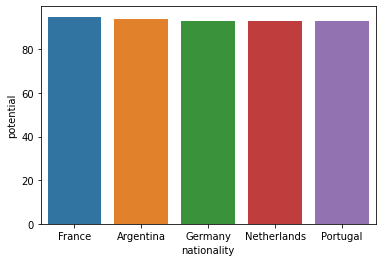

In [ ]:
# top 5 countries on the basis of potential
sns.barplot(top_potential_players['nationality'].head(5),top_potential_players['potential'].head(5))

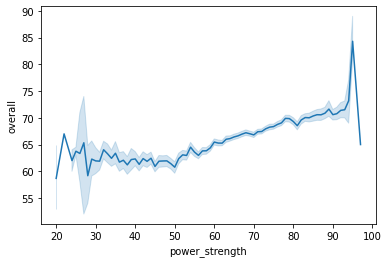

In [62]:
# strength v/s balance
sns.lineplot(data['power_strength'],data['overall'])

Overall rating of player tends to increase as power_strength of player increase .

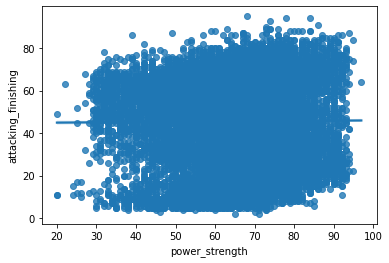

In [ ]:
# strength v/s finishing
sns.regplot(data['power_strength'],data['attacking_finishing'])

There is as such no replationship between players strength with his finishing skill.

In [ ]:
top_valued =data.sort_values(by=['value_eur'],ascending=False)
top_valued.head(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,joined,contract_valid_until,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2017-08-03,2022.0,LW,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2004-07-01,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
10,K. Mbappé,20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,Yes,191700000.0,"#Speedster, #Dribbler, #Acrobat",RW,7.0,2018-07-01,2022.0,RM,96.0,84.0,78.0,90.0,39.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Early Crosser, Spe...",78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3
5,K. De Bruyne,28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,166500000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,2015-08-30,2023.0,RCM,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Avoids Using Weaker Foot, Div...",93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2019-07-01,2024.0,LF,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
12,H. Kane,25,188,89,England,Tottenham Hotspur,89,91,83000000,220000,ST,Right,3,4,3,High/High,Normal,Yes,159800000.0,"#Engine, #Distance

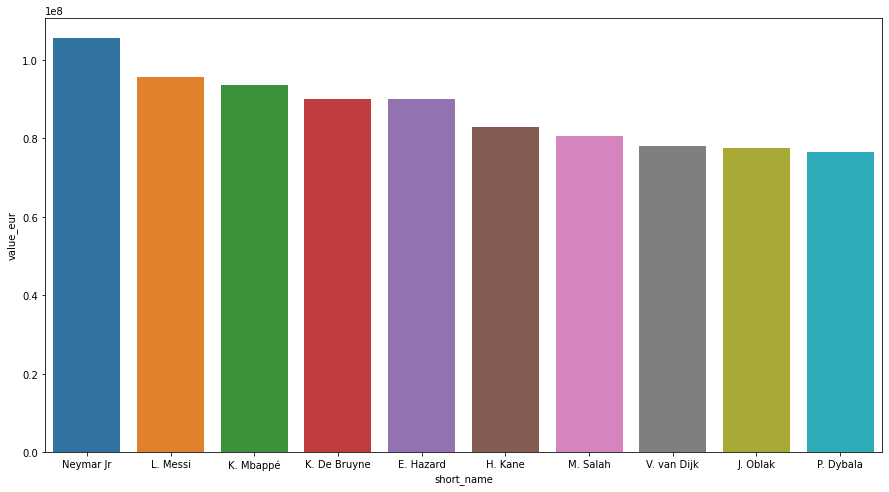

In [ ]:
# Top 10 players on the basis of their net worth (value)
plt.figure(figsize=(15,8))
sns.barplot(top_valued['short_name'].head(10),top_valued['value_eur'].head(10))